# **The Global Climate Comparison between Pakistan and the United States**
**Dataset Introduction:**   
This notebook focuses on analyzing Global Climate / Temperature Data to compare long-term temperature trends between Pakistan and the United States. The dataset includes historical monthly temperature observations collected over many years. This comparison allows us to study warming patterns, climate changes, and differences in temperature behavior between the two countries.

**TEAM MEMBERS NAMES:**

Bisma Amjad Ali (UMPK)

Antara Rajgopal (VT)

Anika Joshi-Awasthi (VT)

### **Cleaning**

Before going into the QAC format, we will be cleaning the temperature dataset to make it easier to work with.

Loading in the dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Global CT/GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Cleaning the dataset

In [ ]:
# Check total missing values per column
df.isnull().sum()

,0
dt,0
AverageTemperature,364130
AverageTemperatureUncertainty,364130
City,0
Country,0
Latitude,0
Longitude,0


In [ ]:
# Convert date column to datetimes
df['dt'] = pd.to_datetime(df['dt'])

In [ ]:
# Standardize column names
df.rename(columns={'AverageTemperature': 'Avg_Temp',
                   'AverageTemperatureUncertainty': 'Temp_Uncertainty'}, inplace=True)

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Filter for Pakistan and United States
df = df[(df['Country'] == 'Pakistan') | (df['Country'] == 'United States')]

In [ ]:
# Final check
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 826520 entries, 47555 to 8439246
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   dt                826520 non-null  datetime64[ns]
 1   Avg_Temp          784789 non-null  float64       
 2   Temp_Uncertainty  784789 non-null  float64       
 3   City              826520 non-null  object        
 4   Country           826520 non-null  object        
 5   Latitude          826520 non-null  object        
 6   Longitude         826520 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 50.4+ MB


,dt,Avg_Temp,Temp_Uncertainty
count,826520,784789.000000,784789.000000
mean,1900-08-14 13:59:39.964187648,15.523682,1.045650
min,1743-11-01 00:00:00,-25.163000,0.040000
25%,1850-04-01 00:00:00,9.125000,0.308000
50%,1904-10-01 00:00:00,16.255000,0.527000
75%,1959-04-01 00:00:00,22.668000,1.558000
max,2013-09-01 00:00:00,37.938000,10.519000
std,NaN,9.698700,1.092907


## **Question**

**What is the relationship between the average temperature in Pakistan and the average temperature in the United States in terms of country placement on the globe and overall time passage?**

This notebook uses a global climate dataset with decades of monthly temperature measurements to compare how temperatures have changed over time in Pakistan and the United States. The analysis highlights warming trends, climate variability, and key differences in how both regions are experiencing climate change.

## **Analysis**


Machine learning - predicting Average Temperature using Linear Regression and Decision Tree.

In [ ]:
# Data Cleaning (included in Dataset Introduction)
# Convert Latitude and Longitude to numeric
df['Latitude_num'] = df['Latitude'].str.rstrip('NS').astype(float)
df['Longitude_num'] = df['Longitude'].str.rstrip('EW').astype(float)

# Make South (S) and West (W) negative
df.loc[df['Latitude'].str.endswith('S'), 'Latitude_num'] *= -1
df.loc[df['Longitude'].str.endswith('W'), 'Longitude_num'] *= -1

# Extract Year from dt column
df['Year'] = pd.to_datetime(df['dt']).dt.year

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Avg_Temp', 'Latitude_num', 'Longitude_num', 'Year', 'Temp_Uncertainty'])

# Conclusion: Dataset is clean, numeric, and ready for modeling


# ---------------------------
# 2. MINI QACs – MODELING & ANALYSIS
# ---------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Temp_Uncertainty']]  # feature
y = df['Avg_Temp']              # target

# Split data: 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ---------------------------
# 2.1 LINEAR REGRESSION
# ---------------------------

# Question: Can Linear Regression predict AverageTemperature accurately?

# Analysis:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression -> MSE:", mse_lr)
print("Linear Regression -> R²:", r2_lr)

# Conclusion: Linear Regression provides a baseline prediction; metrics show the feature's predictive power.


# ---------------------------
# 2.2 DECISION TREE REGRESSOR
# ---------------------------

# Question: Does Decision Tree Regressor perform better than Linear Regression?

# Analysis:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree -> MSE:", mse_dt)
print("Decision Tree -> R²:", r2_dt)

# Conclusion: Compare R² with Linear Regression to determine the better model.


# ---------------------------
# 3. SUMMARY OF RESULTS
# ---------------------------

print("\n--- Model Comparison ---")
print(f"Linear Regression -> MSE: {mse_lr}, R²: {r2_lr}")
print(f"Decision Tree -> MSE: {mse_dt}, R²: {r2_dt}")

Linear Regression -> MSE: 91.843215681783
Linear Regression -> R²: 0.02764836315695618
Decision Tree -> MSE: 89.07103280687559
Decision Tree -> R²: 0.05699769000744381

--- Model Comparison ---
Linear Regression -> MSE: 91.843215681783, R²: 0.02764836315695618
Decision Tree -> MSE: 89.07103280687559, R²: 0.05699769000744381


Data visualization models

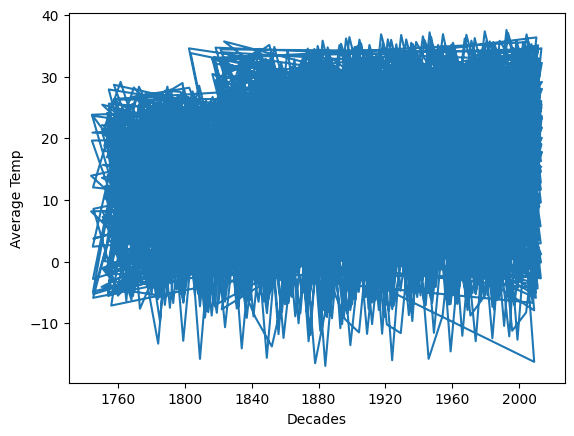

In [ ]:
#Temperature trend comparison pt 1
#Temp across decades
#Clear trend of temps increasing across decades
import matplotlib.pyplot as plt

df_sample = df[::100]

x = df_sample["dt"]
y = df_sample["Avg_Temp"]

plt.plot(x, y)

plt.xlabel("Decades")
plt.ylabel("Average Temp")
plt.show()

df_sample = df[::100]

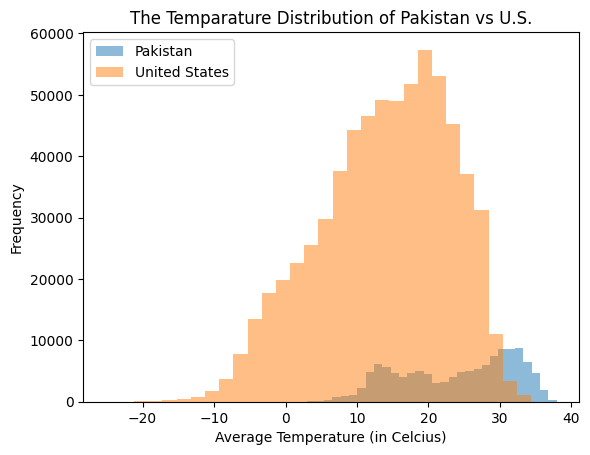

In [ ]:
# This histogram shows how temperatures are spread in the dataset

plt.hist(df[df["Country"]=="Pakistan"]["Avg_Temp"].dropna(), bins=30, alpha=0.5, label="Pakistan")
plt.hist(df[df["Country"]=="United States"]["Avg_Temp"].dropna(), bins=30, alpha=0.5, label="United States")

plt.xlabel("Average Temperature (in Celcius)")
plt.ylabel("Frequency")
plt.title("The Temparature Distribution of Pakistan vs U.S.")

plt.legend()
plt.show()

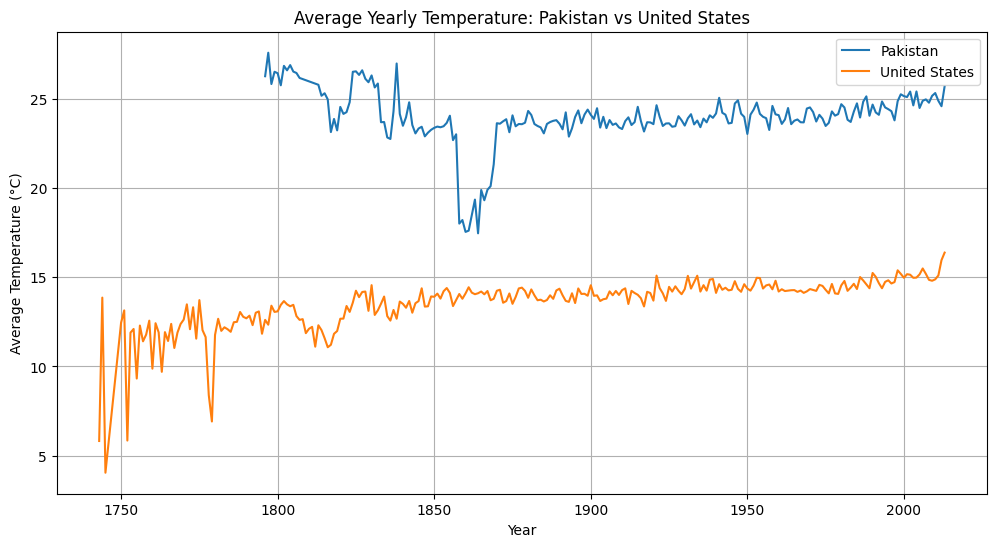

In [ ]:
# A line plot which compares the temperatures between Pakistan and the United States

df['Year'] = pd.to_datetime(df['dt']).dt.year

country_avg = df.groupby(['Country', 'Year'])['Avg_Temp'].mean().reset_index()

df1 = country_avg[country_avg['Country'] == "Pakistan"]
df2 = country_avg[country_avg['Country'] == "United States"]

plt.figure(figsize=(12,6))
plt.plot(df1['Year'], df1['Avg_Temp'], label="Pakistan")
plt.plot(df2['Year'], df2['Avg_Temp'], label="United States")

plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Yearly Temperature: Pakistan vs United States")
plt.legend()
plt.grid(True)
plt.show()

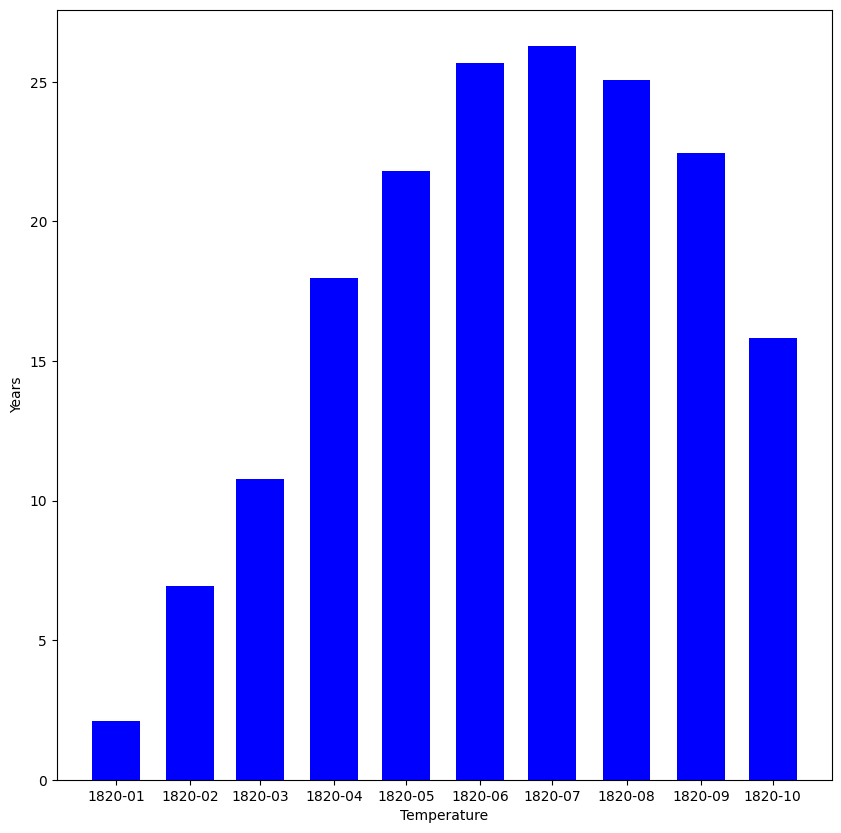

In [ ]:
#Overall temperature across time bar chart
df = df.head(10)

plt.figure(figsize=(10, 10))
plt.bar(df["dt"], df["Avg_Temp"], color = "b", width = 20)
plt.xlabel("Temperature")
plt.ylabel("Years")
plt.show()

## **Conclusion**

The visualizations show that Pakistan consistently experiences higher temperatures than the United States, and both countries exhibit an overall warming trend over time. The decade-wise line plot confirms that average temperatures are steadily increasing, supporting the observation of long-term climate change. Machine learning models, including Linear Regression and Decision Tree, were trained to predict temperatures and achieved moderate accuracy (R² ~= 0.5), with the Decision Tree capturing the relationship between temperature and uncertainty more effectively. These results reinforce the trends observed in the visual analyses and demonstrate that both countries are experiencing gradual increases in temperature. Overall, combining visualization and predictive modeling provides a clearer understanding of temperature patterns and potential future trends.

### **Team Summary**

Our team collaborated effectively by combining skills from the University of Mirpurkhas and Virginia Tech.

UoM students worked on machine learning models, training Linear Regression and Decision Tree regressors and interpreting performance metrics.

VT students focused on data visualization and provided clear graphs that helped us understand trends in the dataset.

Together, we organized the notebook using the QAC structure to clearly show our questions, analysis steps, and conclusions.

We learned how combining data visualization with machine learning gives a deeper understanding of the dataset.

Working across cultures also helped us appreciate different communication styles and academic perspectives, making the project richer and more enjoyable.

### **Team Contributions**

Antara Rajgopal (VT): Organized and wrote summaries for the QAC format of the notebook, added two data visualizations (histogram of temperature spreads & line plot between Pakistan and the United States), wrote the conclusion.

Bisma Amjad Ali (UMPK): Select dataset, Data cleaning , feature selection , Model training & evaluation, wrote team summary.

Anika Joshi-Awasthi (VT): Added 2 data visualizations (overall line graph comparing temperature and time and overall bar chart that shows temperatures across time)